<a href="https://colab.research.google.com/github/rishikaa1/handwritten-digit-recognition/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = mnist['data']
Y = mnist['target']

In [ ]:
X.shape

(70000, 784)

Feature scaling the data


In [ ]:
from sklearn.preprocessing import StandardScaler
X = X/255.0
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Splitting dataset into Training set an Test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled,Y, test_size=0.2, shuffle = True)

In [ ]:
X_train.shape

(56000, 784)

In [ ]:
X_test.shape

(14000, 784)

Visualizing the images of the dataset

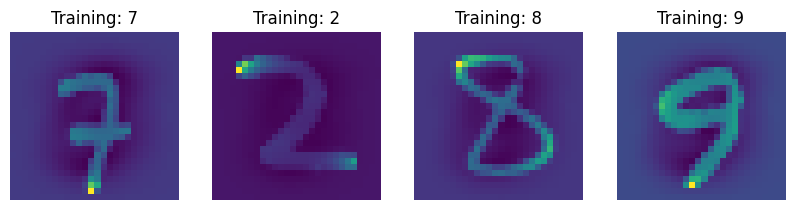

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(28,28)
    ax.imshow(image)
    ax.set_title("Training: %i" % int(label))

Training the Logistic Regression Model on the training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

Predicting Test set Result

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred.shape

(14000,)

Visualizing first four test samples and showing their predicted value

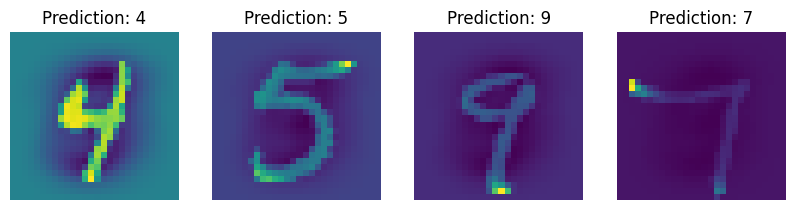

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28,28)
    ax.imshow(image)
    ax.set_title(f"Prediction: {prediction}")

Displaying the Confusion Matrix

Confusion matrix:
[[1337    2    6    3    2    9   14    3    7    3]
 [   0 1515   15    4    2   13    3    3   13    1]
 [  10   14 1236   20   20    7   18   14   36    6]
 [  10   14   32 1234    4   52    5   14   23   12]
 [   2    8   15    3 1260    3   13    9    8   41]
 [  13    7   15   40    8 1103   24    6   43   11]
 [   8    5    9    0   10   18 1316    1    7    0]
 [   4    9   11    8   16    3    0 1314    4   56]
 [  10   32   15   39    9   47   12    4 1256   14]
 [  13   10    7   21   34    7    0   54   14 1235]]


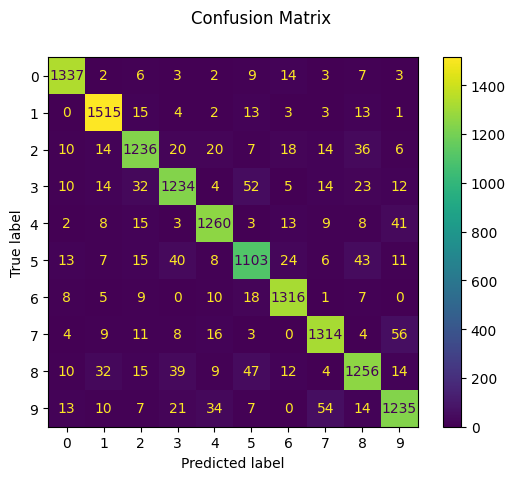

In [ ]:
import sklearn.metrics as metrics
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9147142857142857